# 1. Import the dataset and understand it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN


# 2. List down the number of rows and columns.

In [28]:
#Q2.List down the number of rows and columns.
df.shape

(39717, 23)

# 3. ‘Int_rate’ column is character type. With the help of lambda function convert into float type.

In [29]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.strip('%')))

In [30]:
df.dtypes

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
emp_length              object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
Unnamed: 21            float64
Unnamed: 22            float64
dtype: object

# 4. Check the datatype of each column.

In [31]:
df.dtypes

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
emp_length              object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
Unnamed: 21            float64
Unnamed: 22            float64
dtype: object

# 5. Cleaning the dataset- Remove the columns having complete NaN value in the entire dataset.

In [32]:
df = df.dropna(axis=1, how='all')

In [33]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,4 years,...,Not Verified,Fully Paid,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,3 years,...,Not Verified,Fully Paid,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,< 1 year,...,Not Verified,Fully Paid,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,< 1 year,...,Not Verified,Fully Paid,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00


# 6.. Write the code to find the value counts of the ‘loan_status’ category column and filter only the ‘fully paid’ and ‘charged off’ categories.

In [34]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [35]:
#method1
loanstatus_counts = df['loan_status'].value_counts()
counts = loanstatus_counts[(loanstatus_counts.index == 'Fully Paid') | (loanstatus_counts.index == 'Charged Off')]
print(counts)

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


In [36]:
df['loan_status'][df['loan_status'].isin(['Fully Paid', 'Charged Off'])].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [37]:
#method3
df["loan_status"].value_counts()[(df["loan_status"].value_counts().index=="Fully Paid")
                                 |(df["loan_status"].value_counts().index=="Charged Off")]

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

# 7. Filter the ‘Emp_Len’ column to extract the numerical value from the string

In [38]:
a=[]
for i in df["emp_length"].values:
    if type(i)==str:
        d = ""
        for j in i:
            if j.isdigit():
                d=d+str(j)
    else:
        d = "-1"  #treated the null values as -1 for future us
    a.append(d)
print(a)

['10', '1', '10', '10', '1', '3', '8', '9', '4', '1', '5', '10', '1', '3', '3', '1', '4', '10', '1', '6', '3', '10', '10', '5', '1', '2', '9', '2', '10', '1', '7', '5', '2', '2', '7', '10', '2', '1', '1', '1', '4', '10', '9', '10', '10', '6', '10', '6', '10', '5', '8', '9', '1', '4', '1', '7', '7', '1', '2', '1', '1', '6', '1', '1', '10', '7', '5', '4', '4', '2', '5', '5', '1', '3', '1', '10', '10', '1', '1', '10', '3', '2', '6', '4', '10', '2', '4', '1', '9', '4', '1', '3', '3', '10', '4', '6', '4', '7', '10', '1', '2', '7', '8', '6', '7', '10', '10', '10', '5', '10', '8', '8', '3', '5', '1', '9', '6', '2', '1', '1', '10', '4', '3', '4', '10', '10', '7', '10', '6', '3', '1', '8', '5', '2', '10', '4', '1', '10', '2', '5', '1', '2', '4', '1', '7', '2', '4', '8', '6', '5', '1', '8', '5', '10', '5', '1', '1', '2', '2', '10', '10', '2', '2', '5', '3', '2', '10', '10', '-1', '2', '2', '2', '4', '1', '5', '5', '1', '6', '10', '3', '3', '10', '10', '8', '10', '2', '9', '7', '1', '5', '10', '5

In [39]:
df['emp_length']=pd.DataFrame(a)

In [40]:
df['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object

In [41]:
#method2
def numeric_emp_len(emp_len_str):
    if isinstance(emp_len_str, str):
        return (''.join(filter(str.isdigit, emp_len_str)))
    else:
        return None

In [42]:
df['emp_length'] = df['emp_length'].apply(numeric_emp_len)
df['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object

# 8.Using the Lambda function, remove the month from the ‘term’ column such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.

In [43]:
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))
df['term']

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int64

# 9. Create a new column as risky_loan_applicant by comparing loan_amnt and funded_amnt with the following criteria - If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as ‘1’.

In [44]:
df['risky_loan_applicant'] = df.apply(lambda x: '0' if x['loan_amnt'] <= x['funded_amnt'] else '1', axis=1)
df['risky_loan_applicant']

0        0
1        0
2        0
3        0
4        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: risky_loan_applicant, Length: 39717, dtype: object

In [45]:
df['risky_loan_applicant'].value_counts()

0    37868
1     1849
Name: risky_loan_applicant, dtype: int64

In [46]:
#method2
df["risky_loan_applicant"] = df.apply(lambda row : "1" if row["loan_amnt"] > row["funded_amnt"] else "0", axis = 1 )

# 10. Using the bar plot visualize the loan_status column against categorical column grade, term, verification_status . Write the observation from each graph.


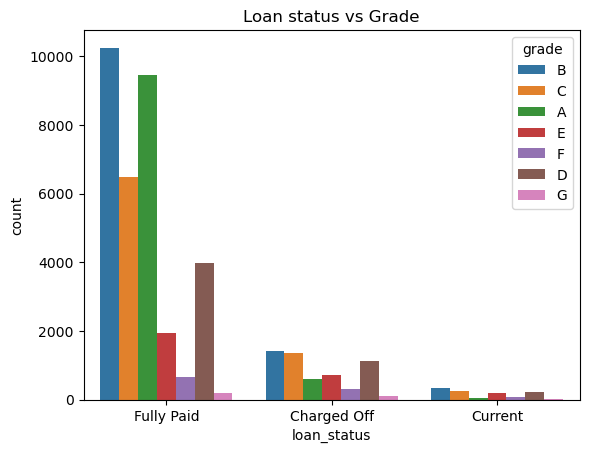

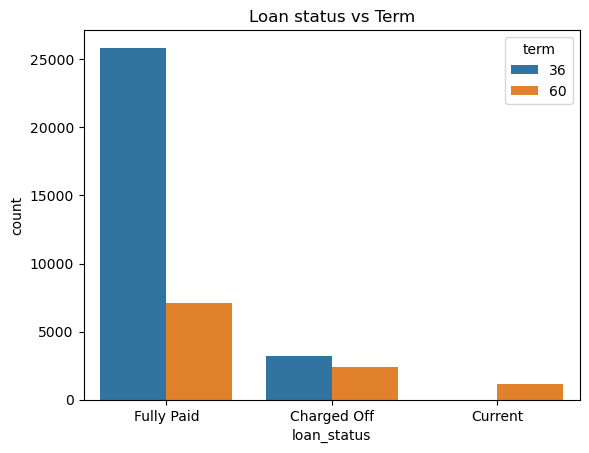

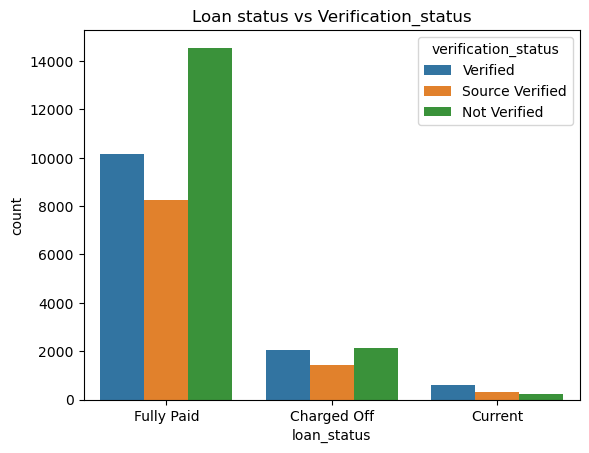

In [47]:
sns.countplot(data = df, x = "loan_status", hue = "grade")
plt.title("Loan status vs Grade")
plt.show()
sns.countplot(data = df, x = "loan_status", hue = "term")
plt.title("Loan status vs Term")
plt.show()
sns.countplot(data = df, x = "loan_status", hue = "verification_status")
plt.title("Loan status vs Verification_status")
plt.show()

* Th number of not verified fully paid loan_status is more.
* Almost the same number of not verified and verified charged off loan status are present.
* The verified current loan_status more in number.
* In verification status most of the people not verified but they fully paid.
* For the term 36, mostly the status is fully paid and there is no loan with current status.
* The count of loans with different grades are the least with current status.


# 11.Using a user defined function convert the ‘emp_len’ column into categorical column as follows -                                                                                 If emp_len is less than equals to 1 then recode as ‘fresher’.                                  If emp_len is greater than 1 and less than 3 then recode as ‘junior’.                     If emp_len is greater than 3 and less than 7 then recode as ‘senior’                     If emp_len is greater than 7 then recode as ‘expert’.

In [48]:
def length(x):
    if (x>=0) and (x<=1):
        return "fresher"
    elif (x>1) and (x<=3):
        return "junior"
    elif (x>3) and (x<=7):
        return "senior"
    elif (x>7):
        return "expert"
    else:
        return "NA"

In [49]:
df['emp_length'].astype("int").apply(length)

0         expert
1        fresher
2         expert
3         expert
4        fresher
          ...   
39712     senior
39713     junior
39714    fresher
39715    fresher
39716    fresher
Name: emp_length, Length: 39717, dtype: object

In [50]:
#checking for all null values
df['emp_length'].astype("int").apply(length)[168]

'fresher'

# 12.Find the sum of ‘loan_amnt’ for each grade and display the distribution of ‘loan_amnt’ using a pie plot.

In [51]:
a = df.groupby("grade")["loan_amnt"].sum()
a

grade
A     86982400
B    133651350
C     89115825
D     65160400
E     45037900
F     19263100
G      6391675
Name: loan_amnt, dtype: int64

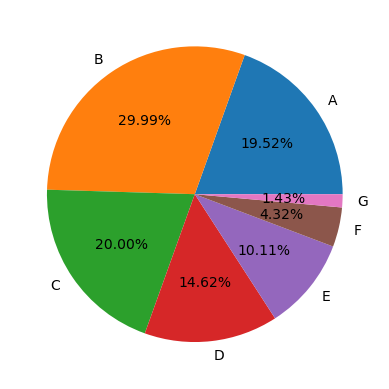

In [52]:
plt.pie(a,labels=a.index,autopct="%0.2f%%")
plt.show()

* The total loan amount provided by the company for loan grade B is highest, followed by that of grade C then A.
* The total loan amount for loan grade G is lowest, followed by that of grade F.


# 13.Find the relation between the numerical value of the loan data

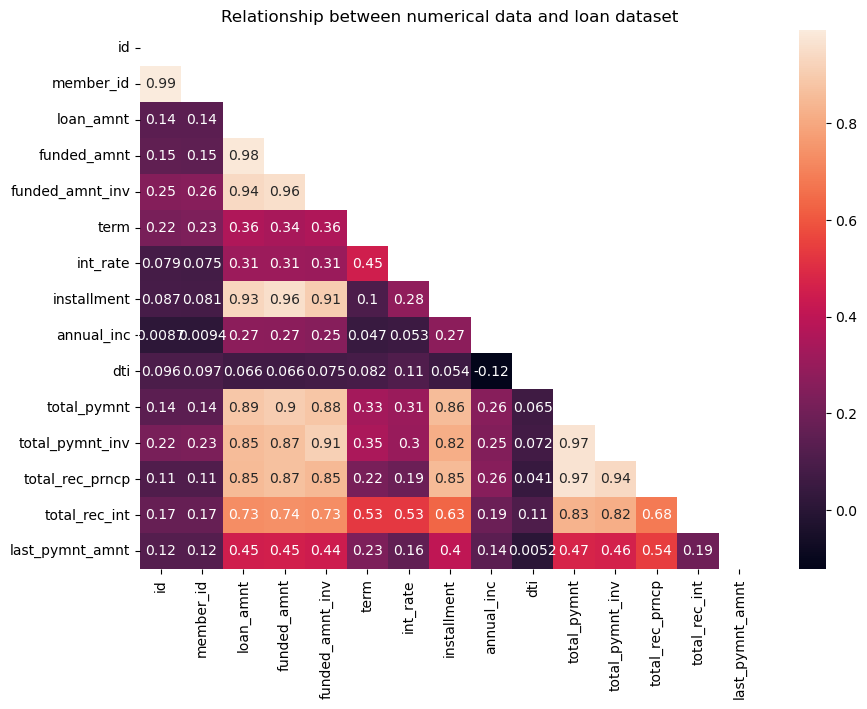

In [53]:
import numpy as np
plt.figure(figsize=(10,7))
masku=np.triu(df.select_dtypes(include=np.number).corr())
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,mask=masku)
plt.title("Relationship between numerical data and loan dataset")
plt.show()

* total_payment_invested has very high positive correlation with total_payment.
* total_rec_prncp has very high positive correlation with total_payment.
* total_funded_amnt has very high positive correlation with invested with loan amnt and funded amnt.
* total_payment has very high positive correlation with funded amnt.
* total rec_prici has very high positive correlation with total payment invested and total payment.
* member_id and id have high positive correlation but does not give inference as its just a number given to customer.
* dti and annual income have weak negative correlation.

# Q14 How does the term of the loan affect the interest rate? You can compare the average interest rates for 36 months and 60 months terms.


In [56]:
# The question is asking about the relationship between the term of a loan (how long it takes for the loan to be paid back) and the interest rate of the loan. 
# Specifically, it’s asking whether loans with a term of 36 months have different average interest rates compared to loans with a term of 60 months.

avg_int_rate = df.groupby('term')['int_rate'].mean()

print(avg_int_rate)


term
36    11.004656
60    14.805912
Name: int_rate, dtype: float64


# 15 What is the most common loan purpose?

In [70]:
most_common_loan_purpose = df['purpose'].value_counts().iloc[[0]]
print("The most common loan purpose is:", most_common_loan_purpose)

The most common loan purpose is: debt_consolidation    18641
Name: purpose, dtype: int64


# 16 What is the percentage of loans that were funded in full?

In [80]:
funded_loans = df[df['funded_amnt'] == df['loan_amnt']]
percentage_funded = (len(funded_loans) / len(df)) * 100
percentage_funded


95.34456278168038

# 17. In each term which grade is least common?

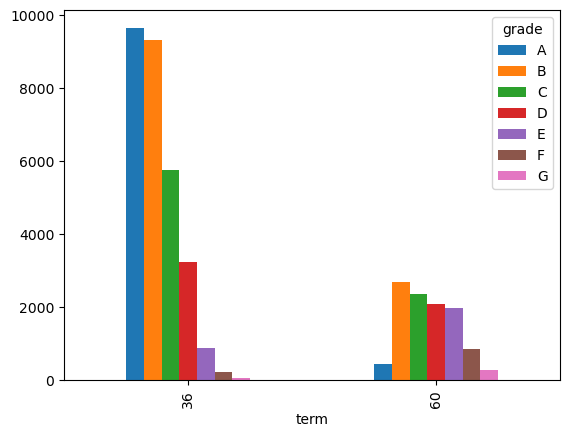

In [100]:
pd.crosstab(index = df['term'], columns = df['grade']).plot(kind = 'bar')
plt.show()

* grade G is least common in both the terms.